## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [1]:
print("Hello World2s")

Hello World2s


In [5]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [85]:
seed = 42
torch.manual_seed(seed)

# Define the data

In [63]:
# your code here
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [64]:
# your code here
data_target = torch.tensor([[0, 0], [0, 1], [0, 1], [1, 1]], dtype=torch.float32)
print(data_target)

tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 1.]])


# Define the models

In [113]:
model1 = nn.Sequential(OrderedDict([
   ('hidden', nn.Linear(2, 3)),
   ('sigmoid1', nn.Sigmoid()),
   ('output', nn.Linear(3, 2)),
   ('sigmoid2', nn.Sigmoid())
]))
print(model1)
model2 = nn.Sequential(OrderedDict([
   ('hidden', nn.Linear(2, 3)),
   ('relu', nn.ReLU()),
   ('output', nn.Linear(3, 2))
]))

model3 = nn.Sequential(OrderedDict([
    ('hidden1', nn.Linear(2, 3)),
    ('relu1', nn.ReLU()),
    ('hidden2', nn.Linear(3, 3)),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(3, 2)),
    ('sigmoid', nn.Sigmoid())
]))

NameError: name 'model' is not defined

In [95]:
print(model1)
print(model2)
print(model3)

Sequential(
  (hidden1): Linear(in_features=2, out_features=8, bias=True)
  (sigmoid1): ReLU()
  (hidden2): Linear(in_features=8, out_features=8, bias=True)
  (sigmoid2): ReLU()
  (hidden3): Linear(in_features=8, out_features=8, bias=True)
  (sigmoid3): Sigmoid()
  (output): Linear(in_features=8, out_features=2, bias=True)
)
Sequential(
  (hidden): Linear(in_features=2, out_features=3, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=3, out_features=2, bias=True)
)
Sequential(
  (hidden1): Linear(in_features=2, out_features=3, bias=True)
  (relu1): ReLU()
  (hidden2): Linear(in_features=3, out_features=3, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=3, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


# Define the loss function and the optimizer

In [110]:
criterion1 = nn.BCE() # Binary Cross Entropy
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.1)

criterion2 = nn.MSELoss() # Binary Cross Entropy Loss that uses sigmoid internally
optimizer2 = torch.optim.SGD(model1.parameters(), lr=0.1)

criterion3 = nn.MSELoss()
optimizer3 = torch.optim.Adam(model1.parameters(), lr=0.1)

In [111]:
losses1 = []
losses2 = []
losses3 = []
# Train the model
num_epochs = 10000
accuracy1 = 0
accuracy2 = 0
accuracy3 = 0
for epoch in range(num_epochs):

    if accuracy1 < 1:
        # zero the gradients
        optimizer1.zero_grad()

        # Forward pass for model 1
        outputs = model1(data_in)
        loss1 = criterion1(outputs, data_target) # calculate loss

        # save the loss for visualization
        losses1.append(loss1.item())

        loss1.backward()          # backward pass
        optimizer1.step()         # update weights

        predicted_classes = (outputs.round() == data_target)

        accuracy1 = predicted_classes.sum().item() / (2 * len(data_target))

        if accuracy1 == 1:
            print(f"<--------------> Model 1 reached 100% accuracy at epoch {epoch+1} <-------------->")


        if (epoch+1) % 1000 == 0:
            print(f'MODEL 1: Epoch [{epoch+1}/{num_epochs}], Loss: {loss1.item():.4f}, Accuracy: {accuracy1:.4f}')

    if accuracy2 < 1:
        # zero the gradients
        optimizer2.zero_grad()

        # Forward pass for model 2
        outputs = model2(data_in)
        loss2 = criterion2(outputs, data_target) # calculate loss

        # save the loss for visualization
        losses2.append(loss2.item())

        loss2.backward()          # backward pass
        optimizer2.step()         # update weights

        predicted_classes = (outputs.round() == data_target)

        accuracy2 = predicted_classes.sum().item() / (2 * len(data_target))

        if accuracy2 == 1:
            print(f"<-------------->Model 2 reached 100% accuracy at epoch {epoch+1}<-------------->")


        if (epoch+1) % 1000 == 0:
            print(f'MODEL 2: Epoch [{epoch+1}/{num_epochs}], Loss: {loss2.item():.4f}, Accuracy: {accuracy2:.4f}')

    if accuracy3 < 1:
        # zero the gradients
        optimizer3.zero_grad()

        # Forward pass for model 3
        outputs = model3(data_in)
        loss3 = criterion3(outputs, data_target) # calculate loss

        # save the loss for visualization
        losses3.append(loss3.item())

        loss3.backward()          # backward pass
        optimizer3.step()         # update weights

        predicted_classes = (outputs.round() == data_target)

        accuracy3 = predicted_classes.sum().item() / (2 * len(data_target))

        if accuracy3 == 1:
            print(f"<--------------> Model 3 reached 100% accuracy at epoch {epoch+1} <-------------->")


        if (epoch+1) % 1000 == 0:
            print(f'MODEL 3: Epoch [{epoch+1}/{num_epochs}], Loss: {loss3.item():.4f}, Accuracy: {accuracy3:.4f}')



MODEL 1: Epoch [1000/10000], Loss: 0.1579, Accuracy: 0.7500
MODEL 2: Epoch [1000/10000], Loss: 0.1793, Accuracy: 0.7500
MODEL 3: Epoch [1000/10000], Loss: 0.2286, Accuracy: 0.7500
<--------------> Model 1 reached 100% accuracy at epoch 1945 <-------------->
MODEL 2: Epoch [2000/10000], Loss: 0.1793, Accuracy: 0.7500
MODEL 3: Epoch [2000/10000], Loss: 0.2286, Accuracy: 0.7500
MODEL 2: Epoch [3000/10000], Loss: 0.1793, Accuracy: 0.7500
MODEL 3: Epoch [3000/10000], Loss: 0.2286, Accuracy: 0.7500
MODEL 2: Epoch [4000/10000], Loss: 0.1793, Accuracy: 0.7500
MODEL 3: Epoch [4000/10000], Loss: 0.2286, Accuracy: 0.7500
MODEL 2: Epoch [5000/10000], Loss: 0.1793, Accuracy: 0.7500
MODEL 3: Epoch [5000/10000], Loss: 0.2286, Accuracy: 0.7500
MODEL 2: Epoch [6000/10000], Loss: 0.1793, Accuracy: 0.7500
MODEL 3: Epoch [6000/10000], Loss: 0.2286, Accuracy: 0.7500
MODEL 2: Epoch [7000/10000], Loss: 0.1793, Accuracy: 0.7500
MODEL 3: Epoch [7000/10000], Loss: 0.2286, Accuracy: 0.7500
MODEL 2: Epoch [8000/1

# Visualize the loss

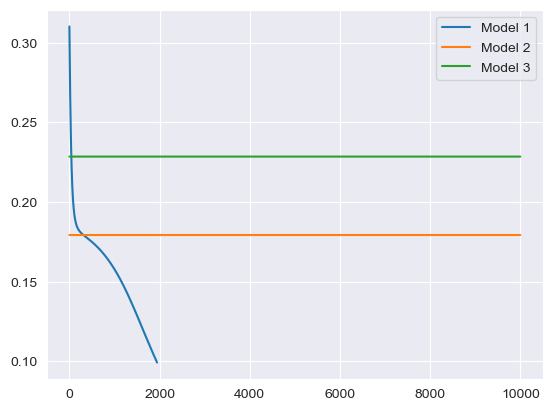

In [112]:

import matplotlib.pyplot as plt

plt.plot(losses1, label='Model 1')
plt.plot(losses2, label='Model 2')
plt.plot(losses3, label='Model 3')
plt.legend()
plt.show()
#

# Visualize the results

In [74]:
print(f"Model1 predictions: {model1(data_in).round()}")
print(f"Model2 predictions: {model2(data_in).round()}")
print(f"Model3 predictions: {model3(data_in).round()}")

Model1 predictions: tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 1.]], grad_fn=<RoundBackward0>)
Model2 predictions: tensor([[-0., -0.],
        [-0., -0.],
        [-0., -0.],
        [-0., -0.]], grad_fn=<RoundBackward0>)
Model3 predictions: tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]], grad_fn=<RoundBackward0>)


In [114]:
# your code here
# print model wights
print(f"<--------------Model1 weights: -------------->")
for name, param in model1.named_parameters():
    if param.requires_grad:
        print(name, param.data)
        print(name, torch.max(param.data))

print(f"<--------------Model2 weights: -------------->")
for name, param in model2.named_parameters():
    if param.requires_grad:
        print(name, param.data)
        print(name, torch.max(param.data))

print(f"<--------------Model3 weights: -------------->")
for name, param in model3.named_parameters():
    if param.requires_grad:
        print(name, param.data)
        print(name, torch.max(param.data))

<--------------Model1 weights: -------------->
hidden.weight tensor([[-0.1308,  0.3324],
        [ 0.6483,  0.2537],
        [-0.2786, -0.6621]])
hidden.weight tensor(0.6483)
hidden.bias tensor([ 0.2561, -0.3503,  0.3598])
hidden.bias tensor(0.3598)
output.weight tensor([[ 0.3859,  0.2227,  0.5417],
        [ 0.5484,  0.1222, -0.4207]])
output.weight tensor(0.5484)
output.bias tensor([ 0.5158, -0.2740])
output.bias tensor(0.5158)
<--------------Model2 weights: -------------->
hidden.weight tensor([[ 0.2809, -0.6314],
        [ 0.4071, -0.2198],
        [-0.5379,  0.1034]])
hidden.weight tensor(0.4071)
hidden.bias tensor([ 0.3426,  0.6119, -0.4319])
hidden.bias tensor(0.6119)
output.weight tensor([[-0.2841,  0.1110,  0.1566],
        [ 0.2220,  0.3169, -0.1309]])
output.weight tensor(0.3169)
output.bias tensor([0.3208, 0.4257])
output.bias tensor(0.4257)
<--------------Model3 weights: -------------->
hidden1.weight tensor([[-0.1847,  0.5031],
        [ 0.3455,  0.6237],
        [-0.4018